In [1]:
import pandas as pd
dataset = pd.read_csv('data/disaster_train.csv')
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [2]:
dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [2]:
import pandas as pd

# 填補缺失值
dataset['keyword'].fillna('missing', inplace=True)
dataset['location'].fillna('unknown', inplace=True)

dataset

C:\Users\morris\AppData\Local\Temp\ipykernel_12284\3830138877.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['keyword'].fillna('missing', inplace=True)
C:\Users\morris\AppData\Local\Temp\ipykernel_12284\3830138877.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,id,keyword,location,text,target
0,1,missing,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,4,missing,unknown,Forest fire near La Ronge Sask. Canada,1
2,5,missing,unknown,All residents asked to 'shelter in place' are ...,1
3,6,missing,unknown,"13,000 people receive #wildfires evacuation or...",1
4,7,missing,unknown,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,missing,unknown,Two giant cranes holding a bridge collapse int...,1
7609,10870,missing,unknown,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,missing,unknown,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,missing,unknown,Police investigating after an e-bike collided ...,1


In [4]:
# 簡單檢查
print(dataset.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [12]:
unique_keyword = dataset['keyword'].unique()
unique_location = dataset['location'].unique()


print(len(unique_keyword))
print(len(unique_location))

222
3342


C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.76      0.88      0.82       874
           1       0.80      0.62      0.70       649

    accuracy                           0.77      1523
   macro avg       0.78      0.75      0.76      1523
weighted avg       0.77      0.77      0.76      1523



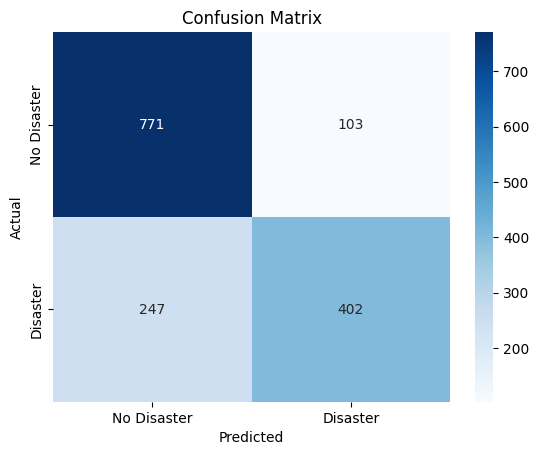

In [22]:
# after kill stopwords

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


# Define features (TF-IDF for each column) and target
vectorizer_keyword = TfidfVectorizer(max_features=100, stop_words='english')
vectorizer_location = TfidfVectorizer(max_features=3000, stop_words='english')
vectorizer_text = TfidfVectorizer(max_features=5000, stop_words='english')

X_keyword = vectorizer_keyword.fit_transform(dataset['keyword'])
X_location = vectorizer_location.fit_transform(dataset['location'])
X_text = vectorizer_text.fit_transform(dataset['text'])

# Combine all TF-IDF features
from scipy.sparse import hstack
X_combined = hstack([X_keyword, X_location, X_text])

y = dataset['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disaster', 'Disaster'], yticklabels=['No Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       874
           1       0.81      0.67      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.79      1523



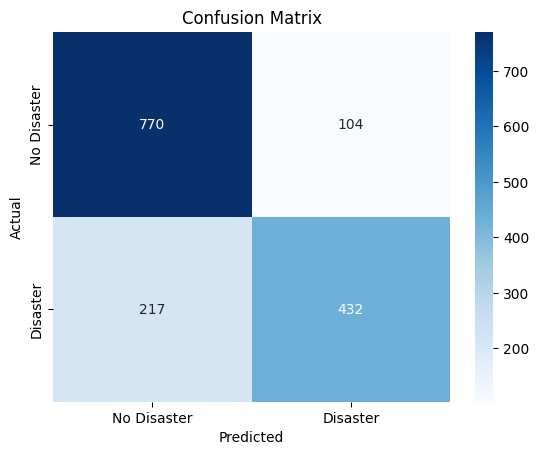

In [24]:
#no kill

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


# Define features (TF-IDF for each column) and target
vectorizer_keyword = TfidfVectorizer(max_features=100)
vectorizer_location = TfidfVectorizer(max_features=3000)
vectorizer_text = TfidfVectorizer(max_features=5000)

X_keyword = vectorizer_keyword.fit_transform(dataset['keyword'])
X_location = vectorizer_location.fit_transform(dataset['location'])
X_text = vectorizer_text.fit_transform(dataset['text'])

# Combine all TF-IDF features
from scipy.sparse import hstack
X_combined = hstack([X_keyword, X_location, X_text])

y = dataset['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disaster', 'Disaster'], yticklabels=['No Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import f1_score

# 定義函數來訓練模型和計算性能
def evaluate_feature(X_feature, y):
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

# 評估各欄位的影響
keyword_score = evaluate_feature(X_keyword, y)
location_score = evaluate_feature(X_location, y)
text_score = evaluate_feature(X_text, y)

# 輸出結果
print(f"Keyword F1-Score: {keyword_score:.4f}")
print(f"Location F1-Score: {location_score:.4f}")
print(f"Text F1-Score: {text_score:.4f}")


C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [22:03:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Keyword F1-Score: 0.5000
Location F1-Score: 0.2795
Text F1-Score: 0.7204


C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [10:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [10:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [10:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\User

Best Parameters: {'max_features_keyword': 300, 'max_features_location': 500, 'max_features_text': 4000}
Best Score: 0.8003939592908733


C:\Users\morris\anaconda3\envs\learn\lib\site-packages\xgboost\core.py:158: UserWarning: [10:24:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



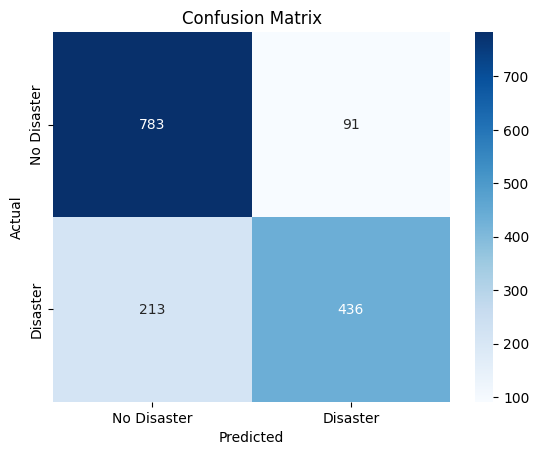

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

# Dataset loading (ensure your dataset is already loaded)
# Assume dataset has columns: 'keyword', 'location', 'text', 'target'

# Train-test split
X = dataset[['keyword', 'location', 'text']]
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom feature union for TF-IDF transformation
class FeatureUnionTransformer:
    def __init__(self, max_features_keyword, max_features_location, max_features_text):
        self.vectorizer_keyword = TfidfVectorizer(max_features=max_features_keyword)
        self.vectorizer_location = TfidfVectorizer(max_features=max_features_location)
        self.vectorizer_text = TfidfVectorizer(max_features=max_features_text)

    def fit(self, X, y=None):
        self.vectorizer_keyword.fit(X['keyword'])
        self.vectorizer_location.fit(X['location'])
        self.vectorizer_text.fit(X['text'])
        return self

    def transform(self, X):
        X_keyword = self.vectorizer_keyword.transform(X['keyword'])
        X_location = self.vectorizer_location.transform(X['location'])
        X_text = self.vectorizer_text.transform(X['text'])
        return hstack([X_keyword, X_location, X_text])

# Define custom pipeline for XGBoost
class CustomXGBoostPipeline:
    def __init__(self, max_features_keyword, max_features_location, max_features_text):
        self.feature_union = FeatureUnionTransformer(
            max_features_keyword, max_features_location, max_features_text
        )
        self.model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    def fit(self, X, y):
        self.feature_union.fit(X, y)
        X_transformed = self.feature_union.transform(X)
        self.model.fit(X_transformed, y)
        return self

    def predict(self, X):
        X_transformed = self.feature_union.transform(X)
        return self.model.predict(X_transformed)

    def score(self, X, y):
        X_transformed = self.feature_union.transform(X)
        return self.model.score(X_transformed, y)

# Grid Search parameters
param_grid = {
    'max_features_keyword': [100, 150, 200, 300],
    'max_features_location': [500, 1000, 2000, 2500],
    'max_features_text': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], # make it more
}

best_score = 0
best_params = None

for keyword in param_grid['max_features_keyword']:
    for location in param_grid['max_features_location']:
        for text in param_grid['max_features_text']:
            pipeline = CustomXGBoostPipeline(
                max_features_keyword=keyword,
                max_features_location=location,
                max_features_text=text,
            )
            pipeline.fit(X_train, y_train)
            score = pipeline.score(X_test, y_test)

            if score > best_score:
                best_score = score
                best_params = {
                    'max_features_keyword': keyword,
                    'max_features_location': location,
                    'max_features_text': text,
                }

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Refit model with best parameters
final_pipeline = CustomXGBoostPipeline(
    max_features_keyword=best_params['max_features_keyword'],
    max_features_location=best_params['max_features_location'],
    max_features_text=best_params['max_features_text'],
)
final_pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disaster', 'Disaster'], yticklabels=['No Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
